# **Traffic Safety in Washington, D.C.**

Contributors: Darian Madere and Nimu Sidhu

# Goals

The goal of this analysis is to gain a better understanding of factors influencing the number of traffic accidents, injuries, and safety concern reports in Washington, D.C. Specifically, we tested whether ward, traffic cameras, and bike routes have a significant association with traffic safety. We tested six hypotheses and developed three recommendations for improvements.

### Data Sources

We used [Open Data DC](https://opendata.dc.gov/) to source the following four datasets:


- [Crashes in DC](https://opendata.dc.gov/datasets/crashes-in-dc/data) contains location, injury, and fatality information per traffic accident.
- [Vision Zero Safety](https://opendata.dc.gov/datasets/vision-zero-safety/) contains traffic safety reports from DC residents, including location and type of safety concern.
- [Traffic Cameras](https://opendata.dc.gov/datasets/traffic-camera/) contains traffic camera locations in DC.
- [Signed Bike Routes](https://opendata.dc.gov/datasets/signed-bike-routes/data) contains bike route locations in DC. 

### **Imports and Styles**

These .py files call the APIs and run our data cleaning process.

In [14]:
# ignores Python warnings from Pandas, remove to show warnings
import warnings
warnings.filterwarnings("ignore")

%run ../python_files/CallAPIs
%run ../python_files/Clean_Orig_Data
%run ../python_files/Create_Aggregate_Datasets

from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

sns.set(style="whitegrid")

Response Status Code = 200
Response Status Code = 200
Response Status Code = 200
Response Status Code = 200
Response Status Code = 200
Response Status Code = 200
Response Status Code = 200
Response Status Code = 200


## Statistical Tests

The data sources used in this analysis report nominal data on traffic accidents and residents’ safety concerns. We aggregate this data as frequency information per street segment ID, or block, and per ward. In this aggregate data, the sample sizes are unequal, as some blocks and wards experience more traffic safety issues. Provided these two limitations, a non-parametric test or distribution-free statistic is most appropriate for our analysis. 

We have selected the [Chi-square test](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3900058/) as our non-parametric statistic of choice. The assumptions for this test are the following:

* The data in the cells should be frequencies, or counts of cases.
* The levels (or categories) of the variables are mutually exclusive.
* Each subject may contribute data to only one cell.
* The study groups must be independent.
* The value of the cell expecteds should be 5 or more in at least 80% of the cells, and no cell should have an expected of less than one. 

If the observed Chi-square statistic is larger than the critical Chi-square statistic, a null hypothesis is rejected. In the case of at least a 2x2 comparison, or two independent categories against two others, Phi or Cramer's V effect size may be computed.

Because the categories for which we compute the observed Chi-square statistic are 1x8, where we observe the correlation between a ward a safety concerns reported, for instance, we have no way of understanding what safety concerns exist that were not reported. As such, we do not have the appropriate information to go one level deeper and compute effect size for any of our tests.

# **Hypothesis #1**

***Does traffic safety differ significantly by ward?***

**Ho**: P(accident, injury, safety concern report) = P(accident, injury, safety concern report) in each ward

**Ha**: P(accident, injury, safety concern report) =/= P(accident, injury, safety concern report) in each ward

In [15]:
# Below are the three datasets that we will independently investigate: 
display(ward_accidents, safety_by_ward_df, ward_injuries)

,incidents
WARD,
Ward 1,96
Ward 2,201
Ward 3,60
Ward 4,73
Ward 5,170
Ward 6,143
Ward 7,139
Ward 8,112


,WARD,SAFETY_CONCERNS
1,1,18.0
2,2,90.0
3,3,6.0
4,4,6.0
5,5,31.0
6,6,93.0
7,7,6.0
8,8,1.0


,total_injuries
Ward 1,60
Ward 2,97
Ward 3,33
Ward 4,47
Ward 5,127
Ward 6,82
Ward 7,99
Ward 8,73


### **Calculate the Chi-Square Statistic**

Calculate the chi-square statistic and critical chi-square value for alpha = 0.05.

#### **Accidents**

In [5]:
chi_o = stats.chisquare(f_obs = ward_accidents.incidents, ddof =1)

chi_c = stats.chi2.isf(q=0.05, df=7)

print(f"Chi Observed: {chi_o[0]}, \nChi Critical for Alpha = 0.05: {chi_c}")

Chi Observed: 130.82897384305835, 
Chi Critical for Alpha = 0.05: 14.067140449340167


Chi Observed (155) > Chi Critical (14)

Because the Chi Observed value is greater than the Chi Critical value, we can state that the probability of getting in an accident in each ward in DC is not equal. The evidence supports that the probability of getting in an accident is associated with ward. 

#### **Injuries**

In [6]:
chi_o2 = stats.chisquare(f_obs = ward_injuries.total_injuries, ddof =1)

chi_c2 = stats.chi2.isf(q=0.05, df=7)

print(f"Chi Observed: {chi_o2[0]}, \nChi Critical for Alpha = 0.05: {chi_c2}")

Chi Observed: 84.7831715210356, 
Chi Critical for Alpha = 0.05: 14.067140449340167


Chi Observed (134) > Chi Critical (14)

Because the Chi Observed value is greater than the Chi Critical value, we can state that the probability of having an injury as the result of an accident in each ward in DC is not equal. The evidence supports that the probability of getting an injury as the result of an accident is associated with ward. 

#### **Safety Concern Reports**

In [7]:
chi_obs = stats.chisquare(f_obs = safety_by_ward_df.SAFETY_CONCERNS,
                ddof =1)

chi_crit = stats.chi2.isf(q=0.05, df=7)

print(f"Chi Observed: {chi_obs[0]}, \nChi Critical for Alpha = 0.05: {chi_crit}")

Chi Observed: 327.2629482071713, 
Chi Critical for Alpha = 0.05: 14.067140449340167


Chi Observed (278) > Chi Critical (14)

Because the Chi Observed value is greater than the Chi Critical value, we can state that residents are not equally  likely to submit safety concern reports across wards. The evidence supports that residents of some wards are more liley to submit safety concern reports than residents in other wards.

### **Visualization of Results for Each Test**

Frequency of traffic accidents, traffic accident injuries, and safety concern reports, differ significantly by ward.

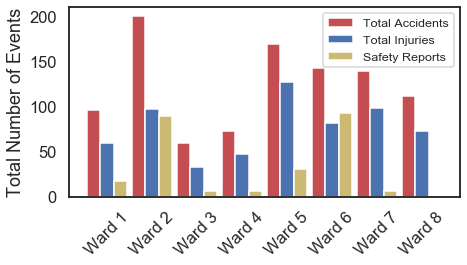

In [9]:
N = 8
ind = np.arange(N)  # the x locations for the groups
width = 0.30       # the width of the bars

sns.set_context('talk')
sns.set_style("white")
fig, ax = plt.subplots(figsize=(7,3.5))

ax.bar(ind-width, ward_accidents.incidents, width, color='r', label = 'Total Accidents')
ax.bar(ind, ward_injuries.total_injuries, width, color='b', label = 'Total Injuries')
ax.bar(ind+width, safety_accid_by_ward_df.SAFETY_CONCERNS, width, color='y', label = 'Safety Reports')

ax.set_xticks(np.arange(8))
xlabels = ward_accidents.index
ax.set_xticklabels(xlabels, rotation=45)

plt.ylabel('Total Number of Events') 
plt.legend(fontsize = 'x-small')

plt.show()

### **Results and Recommendation**

The highest frequency ward for each category is:
* Accidents: Ward 2, followed by Wards 5, 6 and 7
* Injuries: Ward 2, followed by Wards 5, 6, and 7
* Safety Reports: Ward 6, followed by Ward 2

**Recommendation**

As a result of this analysis, it can be concluded that Wards 2 and 6 are facing the greatest traffic safety issues. Vision Zero resources should be directed to the these two wards in particular. This is consistent with the amount of traffic occuring in both of these wards as both are central and overlap the downtown area. 

# **Hypothesis  #2**

***Are street segments, or blocks, containing bike routes or traffic cameras more or less safe than other blocks?***

Here, we consider safety through several lenses:
- Safety concern reports
- Safety concern reports regarding speeding
- Number of accidents involving speeding
- Number of vehicles in accidents
- Number of bicycles in accidents
- Number of pedestrians in accidents

Originally, we wished to look at bicycles in accidents on bike routes and speeding where there are traffic cameras. However, these categories of investigation do not contain the minimum frequency for the chi-square test. As such, we offer the additional metrics for safety in addition to those initially desired.

**Ho**: P(Safety | Bike route or traffic camera) = P(Safety | No bike route or no traffic camera)

**Ha**: P(Safety | Bike route or traffic camera) > P(Safety | No bike route or no traffic camera)

In [7]:
# Below we investigate the following two datasets:
display(bike_route_info_df, trafcam_info_df)

,SAFETY_CONCERNS,TOTAL_VEHICLES,TOTAL_BICYCLES,TOTAL_PEDESTRIANS
Non Bike Route,845.0,1662.0,7.0,49.0
Bike Route,155.0,139.0,1.0,5.0


,SAFETY_CONCERNS,Speeding,SPEEDING_INVOLVED,TOTAL_VEHICLES,TOTAL_BICYCLES,TOTAL_PEDESTRIANS
No Traffic Camera,973.0,21,13.0,1745.0,8.0,52.0
Traffic Camera,27.0,0,0.0,56.0,0.0,2.0


### **Calculate the Chi-Square Statistic**

Find Chi-square and Chi-critical value for alpha = 0.05.

#### **Bike Routes**

In [13]:
prob_bike_r = streets_df.BIKE_R.value_counts()[1]/(streets_df.BIKE_R.value_counts()[1] 
                                                   + streets_df.BIKE_R.value_counts()[0])
prob_non_bike_r = streets_df.BIKE_R.value_counts()[0]/(streets_df.BIKE_R.value_counts()[1] 
                                                       + streets_df.BIKE_R.value_counts()[0])

chi_obs = stats.chisquare(f_obs = bike_route_info_df, 
                          f_exp= [[prob_non_bike_r, prob_non_bike_r, prob_non_bike_r, prob_non_bike_r], 
                                  [prob_bike_r, prob_bike_r, prob_bike_r, prob_bike_r]],
                          ddof =1)

chi_crit = stats.chi2.isf(q=0.05, df=1)

print(f"Chi Observed: {chi_obs[0]}, \nChi Critical for Alpha = 0.05: {chi_crit}")

Chi Observed: [1.29194036e+06 4.82795914e+06 7.22624359e+01 4.11209936e+03], 
Chi Critical for Alpha = 0.05: 3.8414588206941285


Chi Observed, safety concerns (1.3 mill) > Chi Critical (4)

Chi Observed, vehicles involved in accidents (4.8 mill) > Chi Critical (4)

Chi Observed, bicycles involved in accidents (72) > Chi Critical (4)

Chi Observed, pedestrians involved in accidents (4,000) > Chi Critical (4)


Because the Chi Observed value for each of these safety issues is greater than the Chi Critical value, we can conclude that blocks containing bike routes are safer than blocks without bike routes. It is possible that there are other traffic safety factors that correspond to bike routes that we are not aware of that also correlate with greater safety. We reccomend that those factors be studied and instantiated as traffic saftey measures, especially in wards 2 and 6, where the greatest number of accidents occur.

#### **Traffic Cameras**

In [18]:
prob_trafcam = streets_df.TRAFFIC_CAM.value_counts()[1]/(streets_df.TRAFFIC_CAM.value_counts()[1] 
                                                   + streets_df.TRAFFIC_CAM.value_counts()[0])
prob_no_trafcam = streets_df.TRAFFIC_CAM.value_counts()[0]/(streets_df.TRAFFIC_CAM.value_counts()[1] 
                                                       + streets_df.TRAFFIC_CAM.value_counts()[0])

chi_obs = stats.chisquare(f_obs = trafcam_info_df, 
                          f_exp= [[prob_no_trafcam, prob_no_trafcam, prob_no_trafcam, 
                                   prob_no_trafcam, prob_no_trafcam, prob_no_trafcam], 
                                  [prob_trafcam, prob_trafcam, prob_trafcam, 
                                   prob_trafcam, prob_trafcam, prob_trafcam]],
                          ddof =1)

chi_crit = stats.chi2.isf(q=0.05, df=3)

print(f"Chi Observed: {chi_obs[0]}, \nChi Critical for Alpha = 0.05: {chi_crit}")

Chi Observed: [9.98025099e+05 4.11872340e+02 1.48549718e+02 3.24302358e+06
 5.07229700e+01 2.82237613e+03], 
Chi Critical for Alpha = 0.05: 7.814727903251178


Chi Observed, safety concerns (1 mill) > Chi Critical (4)

Chi Observed, speeding safety concerns (400) > Chi Critical (4)

Chi Observed, speeding involved in accidents (150) > Chi Critical (4)

Chi Observed, vehicles involved in accidents (3.2 mill) > Chi Critical (4)

Chi Observed, bicycles involved in accidents (5) > Chi Critical (4)

Chi Observed, pedestrians involved in accidents (2,800) > Chi Critical (4)


Because the Chi Observed value for each of these safety issues is greater than the Chi Critical value, we can conclude that blocks containing traffic cameras are safer than blocks without traffic cameras. It is possible that there are other traffic safety factors that correspond to traffic cameras that we are not aware of that also correlate with greater safety. We reccomend that those factors be studied and instantiated as traffic saftey measures, especially in wards 2 and 6, where the greatest number of accidents occur.

### **Visualizations**

#### **Bike Routes**

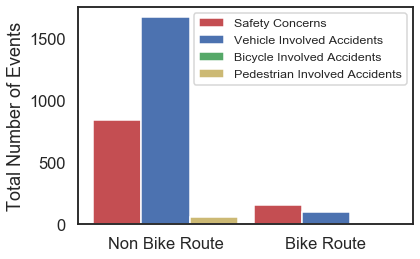

In [10]:
N = 2
ind = np.arange(N)  # the x locations for the groups
width = 0.30       # the width of the bars
sns.set_context('talk')
fig, ax = plt.subplots()

ax.bar(ind-width, bike_route_info_df.SAFETY_CONCERNS, width, color='r', label = 'Safety Concerns')
ax.bar(ind, bike_route_info_df.TOTAL_VEHICLES, width, color='b', label = 'Vehicle Involved Accidents')
ax.bar(ind+width, bike_route_info_df.TOTAL_BICYCLES, width, color='g', label = 'Bicycle Involved Accidents')
ax.bar(ind+width, bike_route_info_df.TOTAL_PEDESTRIANS, width, color='y', label = 'Pedestrian Involved Accidents')

ax.set_xticks(np.arange(2))
xlabels = bike_route_info_df.index
ax.set_xticklabels(xlabels)

plt.ylabel('Total Number of Events') 
plt.legend(fontsize = 'x-small')

plt.show()

#### **Traffic Cameras**

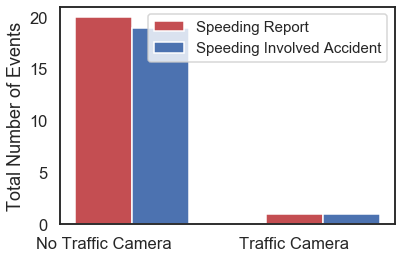

In [11]:
N = 2
ind = np.arange(N)  # the x locations for the groups
width = 0.30       # the width of the bars
sns.set_context('talk')
fig, ax = plt.subplots()

# ax.bar(ind-width, trafcam_info_df.SAFETY_CONCERNS, width, color='r', label = 'Safety Concerns')
ax.bar(ind, trafcam_info_df.Speeding, width, color='r', label = 'Speeding Report')
ax.bar(ind+width, trafcam_info_df.SPEEDING_INVOLVED, width, color='b', label = 'Speeding Involved Accident')

ax.set_xticks(np.arange(2))
xlabels = trafcam_info_df.index
ax.set_xticklabels(xlabels)

plt.ylabel('Total Number of Events') 
plt.legend(fontsize = 'small')

plt.show()

### **Results and Recommendation**

We observed that:
- Routes with no traffic cameras had a higher frequency of safety concern reports compared to routes with traffic cameras.
- Routes with no traffic cameras had a several reports of speeding and speeding involved accidents compared to routes with traffic cameras, which had zero reports of speeding and speeding involved accidents.
- Routes without bike lanes had a higher frequency of safety concern reports compared to routes with signed bike lanes.
- Routes without signed bike lakes had a higher frequency of vehicle, pedestrian, and cyclist involved accidents compared to routes with signed bike lanes.

#### **Recommendations**

Routes with traffic cameras and with signed bike lanes are significantly safer than routes without either of these. Accidents occur much more frequently in the absence of these safety features. It is possible that there are other traffic safety factors that correspond to bike routes and traffic cameras that we are not aware of that also correlate with greater safety. We reccomend that those factors be studied and instantiated as traffic saftey measures, especially in wards 2 and 6, where the greatest number of accidents occur. 

# **Hypothesis #3**

***Based on information per ward, are safety concern reports correlated with number of vehicles, pedestrians, or bicycles involved in accidents?***

**Ho**: P(Safety concern) is independent of P(Accident involvement)

**Ha**: P(Safety concern) correlates with P(Accident involvement)

Safety concern reports are primarily submitted by pedestrians, followed by cyclists and car drivers.

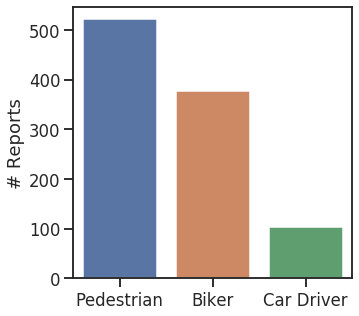

In [0]:
sns.set_context('talk')
sns.set_style('white')
sns.set_style('ticks')
safety_users = pd.DataFrame(safety_df.USERTYPE.value_counts())
plt.figure(figsize=[5,5])
sns.barplot(x = safety_users.index, y = safety_users.USERTYPE)
plt.xlabel("")
plt.ylabel("# Reports")
plt.savefig('user_safety.png')
plt.show()

In [8]:
# Segment each ward into a sample population:
safety_accid_by_ward_df

,WARD,SAFETY_CONCERNS,TOTAL_VEHICLES,TOTAL_PEDESTRIANS,TOTAL_BICYCLES
1,1,25.0,144.0,2.0,1.0
2,2,87.0,301.0,19.0,2.0
3,3,9.0,83.0,1.0,0.0
4,4,15.0,452.0,12.0,1.0
5,5,31.0,240.0,6.0,0.0
6,6,96.0,200.0,6.0,2.0
7,7,6.0,220.0,6.0,2.0
8,8,3.0,151.0,2.0,0.0


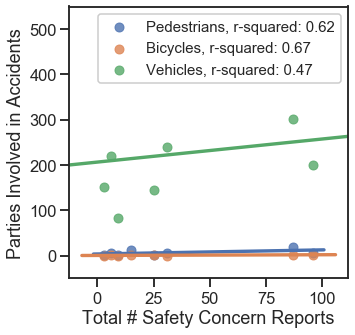

In [15]:
sns.set_context('talk')
sns.set_style('white')
sns.set_style('ticks')
plt.figure(figsize=[5,5])
sns.regplot(safety_accid_by_ward_df.SAFETY_CONCERNS,safety_accid_by_ward_df.TOTAL_PEDESTRIANS, label = "Pedestrians, r-squared: 0.62", ci = None)
sns.regplot(safety_accid_by_ward_df.SAFETY_CONCERNS,safety_accid_by_ward_df.TOTAL_BICYCLES, label = "Bicycles, r-squared: 0.67", ci = None)
sns.regplot(safety_accid_by_ward_df.SAFETY_CONCERNS, safety_accid_by_ward_df.TOTAL_VEHICLES, label = "Vehicles, r-squared: 0.47", ci = None)
plt.ylim(-50, 550)
plt.xlabel("Total # Safety Concern Reports")
plt.ylabel("Parties Involved in Accidents")
plt.legend(loc = 'best', frameon = True, fontsize = 'small', framealpha = 1)
plt.savefig('accident_involvement_safety.png')
plt.show()

#### Pedestrian Accident Involvement

In [9]:
px = safety_accid_by_ward_df.SAFETY_CONCERNS
py = safety_accid_by_ward_df.TOTAL_PEDESTRIANS
slope, intercept, r_value, p_value, std_err = stats.linregress(px,py)
# print(f"r-squared, pedestrians: {r_value**2}")

# These models are displaying slightly different results; use r-squared value from OLS test.
mod = sm.OLS(py, px)
px = sm.add_constant(px)
res = mod.fit()
print(res.summary())
print(f'Slope Confidence Interval: {res.conf_int(0.05)[0][0], res.conf_int(0.05)[1][0]}') # for a 95% confidence interval of SLOPE statistic

                                 OLS Regression Results                                
Dep. Variable:      TOTAL_PEDESTRIANS   R-squared (uncentered):                   0.624
Model:                            OLS   Adj. R-squared (uncentered):              0.570
Method:                 Least Squares   F-statistic:                              11.63
Date:                Wed, 08 Jan 2020   Prob (F-statistic):                      0.0113
Time:                        18:51:23   Log-Likelihood:                         -24.851
No. Observations:                   8   AIC:                                      51.70
Df Residuals:                       7   BIC:                                      51.78
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


#### **Pedestrian Results**

There is very little correlation between the number of safety concern reports and the the number of pedestrians involved in accidents. We can conclude that pedestrian involvement in accidents does not increase the liklihood of residents submitting safety concern reports. 

Additionally, given the poor fit of data, the confidence interval found for the linear regression is very wide.

#### Cyclist Accident Involvement

In [12]:
bx = safety_accid_by_ward_df.SAFETY_CONCERNS
by = safety_accid_by_ward_df.TOTAL_BICYCLES
slope, intercept, r_value, p_value, std_err = stats.linregress(bx,by)
# print(f"r-squared, bicycles: {r_value**2}")

mod = sm.OLS(by, bx)
bx = sm.add_constant(bx)
res = mod.fit()
print(res.summary())
print(f'Slope Confidence Interval: {res.conf_int(0.05)[0][0], res.conf_int(0.05)[1][0]}')

                                 OLS Regression Results                                
Dep. Variable:         TOTAL_BICYCLES   R-squared (uncentered):                   0.667
Model:                            OLS   Adj. R-squared (uncentered):              0.619
Method:                 Least Squares   F-statistic:                              14.00
Date:                Wed, 08 Jan 2020   Prob (F-statistic):                     0.00725
Time:                        18:52:37   Log-Likelihood:                         -9.1962
No. Observations:                   8   AIC:                                      20.39
Df Residuals:                       7   BIC:                                      20.47
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

#### **Cyclist Results**

There is very little correlation between the number of safety concern reports and the the number of bicycles involved in accidents. We can conclude that cyclist involvement in accidents does not increase the liklihood of residents submitting safety concern reports. 

This confidence interval is much smaller, reflecting the stronger linear fit.

In [14]:
vx = safety_accid_by_ward_df.SAFETY_CONCERNS
vy = safety_accid_by_ward_df.TOTAL_VEHICLES
slope, intercept, r_value, p_value, std_err = stats.linregress(vx,vy)
print(f"r-squared, vehicles: {r_value**2}")

mod = sm.OLS(vy, vx)
vx = sm.add_constant(vx)
res = mod.fit()
print(res.summary())
print(f'Slope Confidence Interval: {res.conf_int(0.05)[0][0], res.conf_int(0.05)[1][0]}')

r-squared, vehicles: 0.02728171844717022
                                 OLS Regression Results                                
Dep. Variable:         TOTAL_VEHICLES   R-squared (uncentered):                   0.470
Model:                            OLS   Adj. R-squared (uncentered):              0.394
Method:                 Least Squares   F-statistic:                              6.198
Date:                Wed, 08 Jan 2020   Prob (F-statistic):                      0.0416
Time:                        18:53:37   Log-Likelihood:                         -52.916
No. Observations:                   8   AIC:                                      107.8
Df Residuals:                       7   BIC:                                      107.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.

#### **Vehicle Results**

There is very little correlation between the number of safety concern reports and the the number of vehicles involved in accidents. We can conclude that vehicle involvement in accidents does not increase the liklihood of residents submitting safety concern reports. 

This is perhaps the largest confidence interval, which makes sense provided that number of vehicles involved in accidents varies between very low and very high numbers, unlike number of pedestrians or bicycles. While the fit is slightly better than for pedestrians,the data in general is much more disperse!